In [3]:
# Importing all the modules we need in this notebook
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
import numpy as np
from collections import Counter
from knn import *

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import Normalizer 
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier ## This module is not necessary but we did import it to compare the classifier versus our own classifier. 
from sklearn import metrics

In [4]:
df = pd.read_csv("wine.csv")
x = df.drop(columns="Class")
y = df["Class"]

x.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

Converting the whole csv data to Pandas DataFrame and splitting the feature and class columns. 

In [5]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=27,shuffle=True)

# Converting datas to numpy arrays.
x_train= np.asarray(X_train)
y_train= np.asarray(y_train)
x_test= np.asarray(X_test)
y_test= np.asarray(y_test)

In [6]:
scaler = Normalizer().fit(X_train)
normalized_X_train = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)
print('x train before Normalization\n')
print(X_train[0:5])
print('\nx train after Normalization\n')
print(normalized_X_train[0:5])

x train before Normalization

     Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
18     14.19        1.59  2.48               16.5        108           3.30   
8      14.83        1.64  2.17               14.0         97           2.80   
5      14.20        1.76  2.45               15.2        112           3.27   
132    12.81        2.31  2.40               24.0         98           1.15   
68     13.34        0.94  2.36               17.0        110           2.53   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
18         3.93                  0.32             1.86             8.70  1.23   
8          2.98                  0.29             1.98             5.20  1.08   
5          3.39                  0.34             1.97             6.75  1.05   
132        1.09                  0.27             0.83             5.70  0.66   
68         1.30                  0.55             0.42             3.17  1.02   

     OD2

Normalising the data (putting all of the values between 0 and 1) and showing the difference of dataset by comparing before and after normalisation.

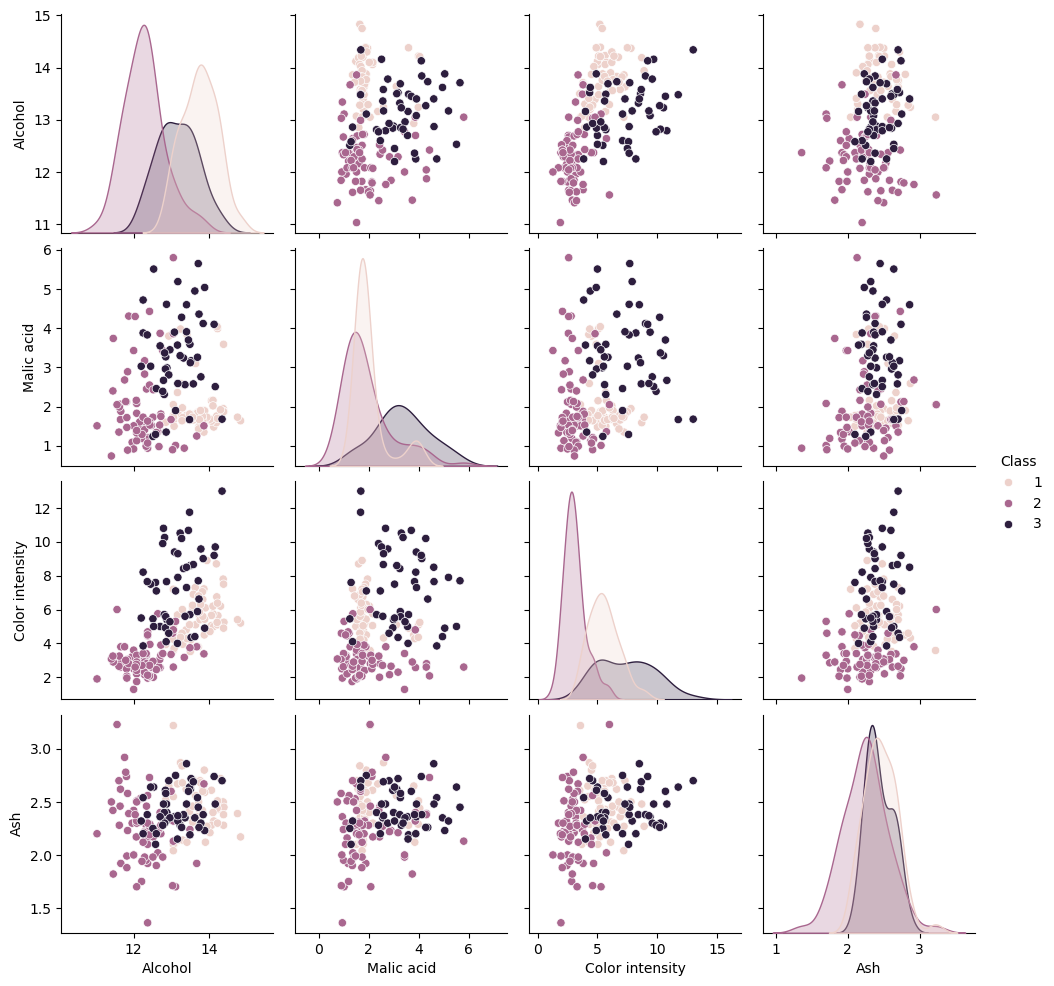

In [7]:
plot = sns.pairplot(data=df, hue = "Class", vars=["Alcohol","Malic acid", "Color intensity", "Ash"])

Some data visualisation to observe if there is any overlapping data.

In [8]:
rows_with_missing = df[df.isna().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [Class, Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []


==> This output shows us that are no empty cells.

For K value 1
Accuracy score: 0.8055555555555556
For K value 3
Accuracy score: 0.7777777777777778
For K value 5
Accuracy score: 0.8333333333333334
For K value 7
Accuracy score: 0.7777777777777778
For K value 9
Accuracy score: 0.8333333333333334
For K value 11
Accuracy score: 0.7777777777777778
For K value 13
Accuracy score: 0.75
For K value 15
Accuracy score: 0.75
For K value 17
Accuracy score: 0.7777777777777778
Best accuracy is: 0.8333333333333334 and corresponding K value is 9


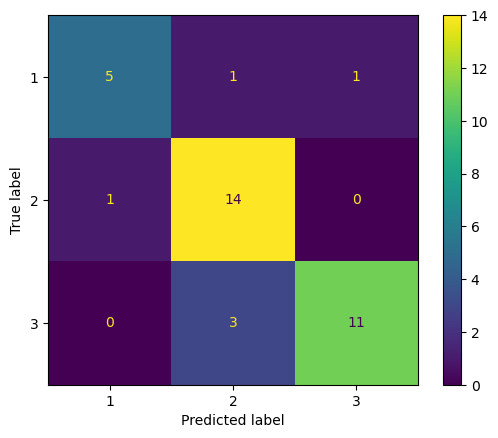

In [9]:
# Predictions made by KNN classifier that uses Euclidian Distance formula 
best_acc = 0.0
k_list = []
acc_list = []
for i in range (1,10):
    K = 2*i-1
        
    y_my_preds = KNN_euc(normalized_X_train,y_train,normalized_X_test, K)
    if accuracy_score(y_test,y_my_preds) >= best_acc:
        best_acc = accuracy_score(y_test,y_my_preds)
        y_best_preds = KNN_euc(normalized_X_train,y_train,normalized_X_test, K)
        k_val = K
    k_list.append(K)
    acc_list.append(accuracy_score(y_test,y_my_preds))
    print(f"For K value {K}")
    print(f"Accuracy score: {accuracy_score(y_test,y_my_preds)}")
    
print(f"Best accuracy is: {best_acc} and corresponding K value is {k_val}")
confusion_matrix = metrics.confusion_matrix(y_test,y_best_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix,display_labels=[1,2,3])
cm_display.plot()
plt.show()

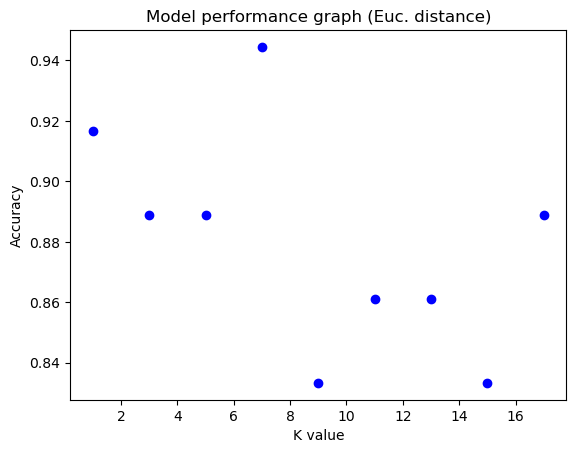

In [14]:
plt.plot(k_list,acc_list,'bo')
plt.title("Model performance graph (Euc. distance)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

For K value 1
Accuracy score: 0.9166666666666666
For K value 3
Accuracy score: 0.8888888888888888
For K value 5
Accuracy score: 0.8888888888888888
For K value 7
Accuracy score: 0.9444444444444444
For K value 9
Accuracy score: 0.8333333333333334
For K value 11
Accuracy score: 0.8611111111111112
For K value 13
Accuracy score: 0.8611111111111112
For K value 15
Accuracy score: 0.8333333333333334
For K value 17
Accuracy score: 0.8888888888888888
Best accuracy is: 0.9444444444444444 and corresponding K value is 7


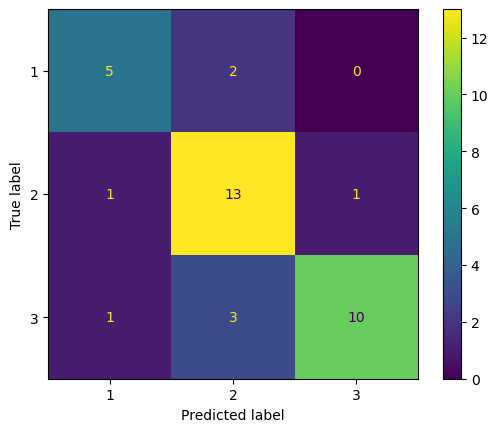

In [11]:
# Predictions made by KNN classifier that uses Manhattan Distance formula 
best_acc = 0.0
k_list = []
acc_list = []
for i in range (1,10):
    K = 2*i-1
        
    y_my_preds = KNN_man(normalized_X_train,y_train,normalized_X_test, K)
    if accuracy_score(y_test,y_my_preds) >= best_acc:
        best_acc = accuracy_score(y_test,y_my_preds)
        y_best_preds = KNN_euc(normalized_X_train,y_train,normalized_X_test, K)
        k_val = K
    k_list.append(K)
    acc_list.append(accuracy_score(y_test,y_my_preds))
    print(f"For K value {K}")
    print(f"Accuracy score: {accuracy_score(y_test,y_my_preds)}")
    
print(f"Best accuracy is: {best_acc} and corresponding K value is {k_val}")
confusion_matrix = metrics.confusion_matrix(y_test,y_best_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix,display_labels=[1,2,3])
cm_display.plot()
plt.show()

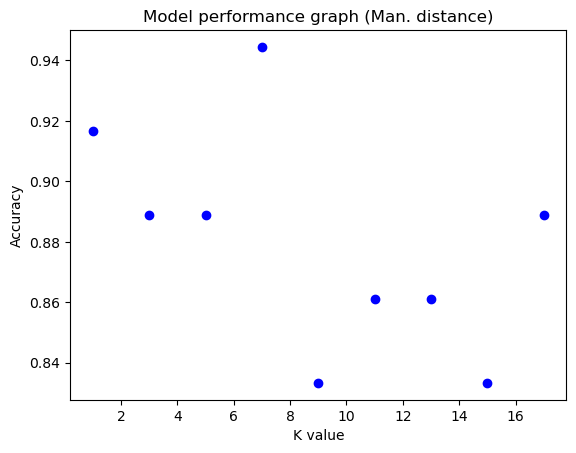

In [15]:
plt.plot(k_list,acc_list,'bo')
plt.title("Model performance graph (Man. distance)")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()